In [17]:
from google.colab import files
import pandas

uploaded = files.upload()
uploaded


import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['total_words3.csv']))
df.head()

Saving total_words3.csv to total_words3 (1).csv


,n,tweet,polarity,subjetivity,positive,negative,Words,sentimiento
0,0,Her fanbase got ta suicide watch lmao,0.600000,1.000000,0.444654,0.555346,37,Positivo
1,1,When employees asks hard questions get lawyers...,-0.502976,0.699405,0.801371,0.198629,167,Negativo
2,2,35 commit suicide fault groomer,0.000000,0.000000,0.462382,0.537618,31,Neutral
3,3,You dislike people without saying deserve hara...,0.000000,0.000000,0.978717,0.021283,83,Neutral
4,4,Is suicide weapon question Pics happen,0.000000,0.000000,0.215152,0.784848,38,Neutral


In [26]:
#valores X
X = df.iloc[:, 2:7]
print(X)
#valores Y
Y = df.iloc[:, 7]
#print(Y)

# Codificar datos categóricos(Cambiamos strings por numeros)
from sklearn.preprocessing import LabelEncoder
#Codificar Sentimiento
labelencoder_X_country = LabelEncoder()
Y[:] = labelencoder_X_country.fit_transform(Y[:])
print(Y)

      polarity  subjetivity  positive  negative  Words
0     0.600000     1.000000  0.444654  0.555346     37
1    -0.502976     0.699405  0.801371  0.198629    167
2     0.000000     0.000000  0.462382  0.537618     31
3     0.000000     0.000000  0.978717  0.021283     83
4     0.000000     0.000000  0.215152  0.784848     38
...        ...          ...       ...       ...    ...
9995  0.000000     0.000000  0.183599  0.816401    107
9996  0.000000     0.000000  0.250000  0.750000      7
9997  0.276515     0.685606  0.954871  0.045129    181
9998  0.050000     0.600000  0.763091  0.236909     78
9999  0.000000     0.000000  0.750000  0.250000      3

[10000 rows x 5 columns]
0       2
1       0
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    2
9998    2
9999    1
Name: sentimiento, Length: 10000, dtype: object


<ipython-input-26-17df4336818c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[:] = labelencoder_X_country.fit_transform(Y[:])


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
#print(y_train)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [35]:
#Escalado de caracteristicas

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#Entrenamiento de la Red Neuronal
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, early_stopping=False, warm_start=True)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000, warm_start=True)

In [42]:
#Predecir
predictions = mlp.predict(X_test)

In [43]:
#Evaluar el Algoritmo
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

[[465   5   0]
 [  0 923   0]
 [  0   3 604]]


In [46]:
# Crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(confusion_matrix(y_test,predictions))
print(dataframe)

     0    1    2
0  465    5    0
1    0  923    0
2    0    3  604


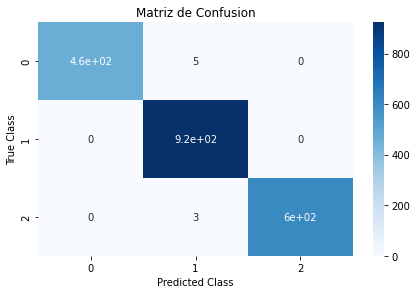

In [45]:
# crear mapa de calor dibujar mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataframe, annot=True, cmap="Blues")
plt.title("Matriz de Confusion"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()